将使用简单的神经网络来实现股票定价模型。我们将使用误差反向传播算法来训练该网络，并使用激活函数进行验证。

In [1]:
import pandas as pd
df = pd.read_csv("股价.csv")
df

,open,high,low,volume,close
0,1022.186,1039.246,1010.186,148099,1024.186
1,1011.186,1011.186,971.086,130318,972.746
2,965.046,987.086,961.486,63414,972.176
3,971.686,993.186,970.586,47853,988.716
4,979.236,989.686,976.766,25008,982.326
...,...,...,...,...,...
723,1723.179,1723.179,1687.199,21384,1694.239
724,1712.089,1721.239,1699.589,17905,1707.089
725,1719.969,1721.089,1682.099,21438,1707.089
726,1691.089,1701.079,1675.139,22418,1693.089


In [2]:
# Z-Score归一化
def z_score_scaling(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

In [3]:
df = z_score_scaling(df)

In [5]:
import numpy as np
X = df.drop(columns='close')
X = np.array(X)
X

array([[-2.10108775, -2.09820261, -2.11251407,  6.21139753],
       [-2.13692653, -2.18846491, -2.24251673,  5.21531141],
       [-2.28725393, -2.26598883, -2.27443554,  1.46737001],
       ...,
       [ 0.17233885,  0.09512297,  0.12151345, -0.88411253],
       [ 0.07824576,  0.03075559,  0.09837231, -0.82921324],
       [ 0.14014911,  0.11439136,  0.18465285, -0.66591584]])

In [6]:
y = df["close"]
y = np.array(y)

In [7]:
y = y.reshape(-1,1)

In [8]:
y

array([[-2.11027235e+00],
       [-2.27867877e+00],
       [-2.28054486e+00],
       [-2.22639552e+00],
       [-2.24731537e+00],
       [-2.19964823e+00],
       [-2.16756458e+00],
       [-2.12903146e+00],
       [-2.18426117e+00],
       [-2.16877590e+00],
       [-2.18557071e+00],
       [-2.18393379e+00],
       [-2.23795218e+00],
       [-2.28935150e+00],
       [-2.28866399e+00],
       [-2.36301294e+00],
       [-2.52303833e+00],
       [-2.41143306e+00],
       [-2.37221244e+00],
       [-2.30342902e+00],
       [-2.28705981e+00],
       [-2.31819405e+00],
       [-2.21503529e+00],
       [-2.21742519e+00],
       [-2.23795218e+00],
       [-2.24777371e+00],
       [-2.22871995e+00],
       [-2.26086907e+00],
       [-2.21994605e+00],
       [-2.14955845e+00],
       [-2.16632052e+00],
       [-2.25045826e+00],
       [-2.29095568e+00],
       [-2.29458965e+00],
       [-2.24977075e+00],
       [-2.34926281e+00],
       [-2.25428865e+00],
       [-2.16592766e+00],
       [-2.1

In [9]:
X.shape

(728, 4)

In [10]:
y.shape

(728, 1)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 生成示例数据
X = X
y = y

# 划分数据集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 构建神经网络模型
model = Sequential()
model.add(Dense(5, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# 编译模型并指定优化器和损失函数
model.compile(optimizer='adam', loss='mean_squared_error')

# 使用反向传播算法训练模型
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 输出预测值
print("预测值:")
print(y_pred)

# 输出真实值
print("真实值:")
print(y_test)


Epoch 1/100
19/19 [==============================] - 1s 8ms/step - loss: 1.0814 - val_loss: 1.0265
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.9154 - val_loss: 0.8897
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.8128 - val_loss: 0.7831
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.7073 - val_loss: 0.6534
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5648 - val_loss: 0.4694
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.3952 - val_loss: 0.3087
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.2657 - val_loss: 0.2013
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1891 - val_loss: 0.1494
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1178
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.1420 - val_loss: 0.1048
Epoch 11/

19/19 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 84/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 85/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 86/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0042
Epoch 87/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 88/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 89/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 90/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 91/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 92/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 93/100


Epoch 1/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0038
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 11/

19/19 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 84/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 85/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 86/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 87/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 88/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 89/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 90/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 91/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 92/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 93/100


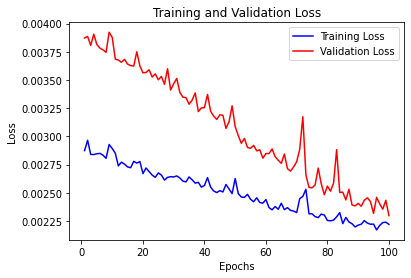

In [12]:
import matplotlib.pyplot as plt

# 假设您有一个变量 history 记录了训练过程的历史损失值
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# 提取训练和验证损失值
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 绘制折线图
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

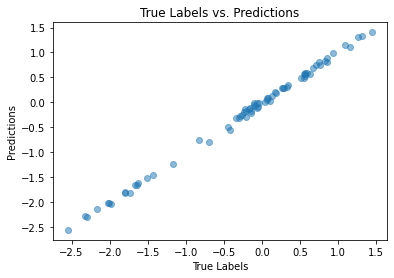

In [13]:
import matplotlib.pyplot as plt

# 假设模型已经训练好，且y_test和y_pred分别是测试集上的真实标签和预测值
# y_test 和 y_pred 都是形状为 (n_samples, 1) 的numpy数组

# 绘制正确标签和预测值的散点图
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.title('True Labels vs. Predictions')
plt.show()